# Repeated Measures

- order: 2

DABEST version 2023.02.14 expands the repertoire of plots for experiments with repeated-measures designs. DABEST now allows the visualization of paired experiments with one control and multiple test 
groups, as well as repeated measurements of the same group. This is an improved version of paired data plotting in previous versions, which only supported computations involving one test group and one control group.

The repeated-measures function supports the calculation of effect sizes for
paired data, either based on sequential comparisons (group i vs group i + 1) 
or baseline comparisons (control vs group i). To use these features, 
you can simply declare the argument ``paired = "sequential"`` or ``paired = "baseline"`` 
correspondingly while running ``dabest.load()``. As in the previous version, you must also pass a column in the dataset that indicates the identity of each observation, using the 
``id_col`` keyword. 

**(Please note that** ``paired = True`` **and** ``paired = False`` **are no longer valid in v2023.02.14)**

## Load Libraries

In [ ]:
import numpy as np
import pandas as pd
import dabest

## Create dataset for demo

In [ ]:
from scipy.stats import norm # Used in generation of populations.

np.random.seed(9999) # Fix the seed so the results are replicable.
# pop_size = 10000 # Size of each population.
Ns = 20 # The number of samples taken from each population

# Create samples
c1 = norm.rvs(loc=3, scale=0.4, size=Ns)
c2 = norm.rvs(loc=3.5, scale=0.75, size=Ns)
c3 = norm.rvs(loc=3.25, scale=0.4, size=Ns)

t1 = norm.rvs(loc=3.5, scale=0.5, size=Ns)
t2 = norm.rvs(loc=2.5, scale=0.6, size=Ns)
t3 = norm.rvs(loc=3, scale=0.75, size=Ns)
t4 = norm.rvs(loc=3.5, scale=0.75, size=Ns)
t5 = norm.rvs(loc=3.25, scale=0.4, size=Ns)
t6 = norm.rvs(loc=3.25, scale=0.4, size=Ns)


# Add a `gender` column for coloring the data.
females = np.repeat('Female', Ns/2).tolist()
males = np.repeat('Male', Ns/2).tolist()
gender = females + males

# Add an `id` column for paired data plotting.
id_col = pd.Series(range(1, Ns+1))

# Combine samples and gender into a DataFrame.
df = pd.DataFrame({'Control 1' : c1,     'Test 1' : t1,
                   'Control 2' : c2,     'Test 2' : t2,
                   'Control 3' : c3,     'Test 3' : t3,
                   'Test 4'    : t4,     'Test 5' : t5, 'Test 6' : t6,
                   'Gender'    : gender, 'ID'  : id_col
                  })

In [ ]:
two_groups_paired_sequential = dabest.load(df, idx=("Control 1", "Test 1"),
                                               paired="sequential", id_col="ID")

In [ ]:
two_groups_paired_sequential

DABEST v0.0.1
             
Good evening!
The current time is Sat Mar 11 22:06:07 2023.

Paired effect size(s) for the sequential design of repeated-measures experiment 
with 95% confidence intervals will be computed for:
1. Test 1 minus Control 1

5000 resamples will be used to generate the effect size bootstraps.

In [ ]:
two_groups_paired_baseline = dabest.load(df, idx=("Control 1", "Test 1"),
                                  paired="baseline", id_col="ID")

In [ ]:
two_groups_paired_baseline

DABEST v0.0.1
             
Good evening!
The current time is Sat Mar 11 22:06:20 2023.

Paired effect size(s) for repeated measures against baseline 
with 95% confidence intervals will be computed for:
1. Test 1 minus Control 1

5000 resamples will be used to generate the effect size bootstraps.

When only 2 paired data groups are involved, assigning either ``baseline``
or ``sequential`` to ``paired`` will give you the same numerical results.

In [ ]:
two_groups_paired_sequential.mean_diff

DABEST v0.0.1
             
Good evening!
The current time is Sat Mar 11 22:06:39 2023.

DABEST v0.0.1
             
Good evening!
The current time is Sat Mar 11 22:06:39 2023.

The paired mean difference for the sequential design of repeated-measures experiment 
between Control 1 and Test 1 is 0.48 [95%CI 0.237, 0.73].
The p-value of the two-sided permutation t-test is 0.001, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis ofzero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

In [ ]:
two_groups_paired_baseline.mean_diff

DABEST v0.0.1
             
Good evening!
The current time is Sat Mar 11 22:06:49 2023.

DABEST v0.0.1
             
Good evening!
The current time is Sat Mar 11 22:06:49 2023.

The paired mean difference for repeated measures against baseline 
between Control 1 and Test 1 is 0.48 [95%CI 0.237, 0.73].
The p-value of the two-sided permutation t-test is 0.001, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis ofzero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

For paired data, we use
[slopegraphs](https://www.edwardtufte.com/bboard/q-and-a-fetch-msg?msg_id=0003nk>)
(another innovation from Edward Tufte) to connect paired observations.
Both Gardner-Altman and Cumming plots support this.


C:\Users\zhang\anaconda3\lib\site-packages\dabest\plotter.py:722: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  control_group_summary = plot_data.groupby(xvar)\
C:\Users\zhang\anaconda3\lib\site-packages\dabest\plotter.py:724: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  test_group_summary = plot_data.groupby(xvar)\


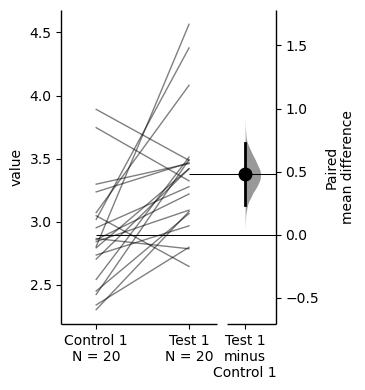

In [ ]:
two_groups_paired_sequential.mean_diff.plot();

C:\Users\zhang\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
C:\Users\zhang\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


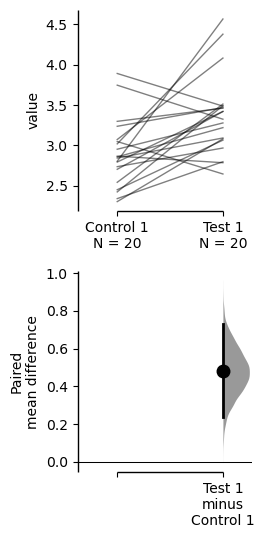

In [ ]:
two_groups_paired_sequential.mean_diff.plot(float_contrast=False);

C:\Users\zhang\anaconda3\lib\site-packages\dabest\plotter.py:722: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  control_group_summary = plot_data.groupby(xvar)\
C:\Users\zhang\anaconda3\lib\site-packages\dabest\plotter.py:724: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  test_group_summary = plot_data.groupby(xvar)\


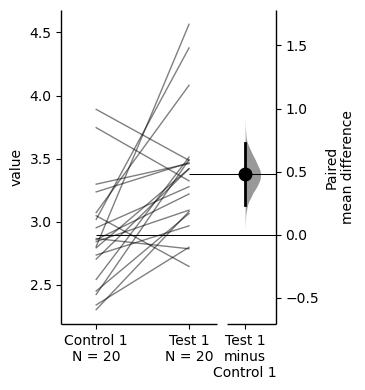

In [ ]:
two_groups_paired_baseline.mean_diff.plot();

C:\Users\zhang\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
C:\Users\zhang\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


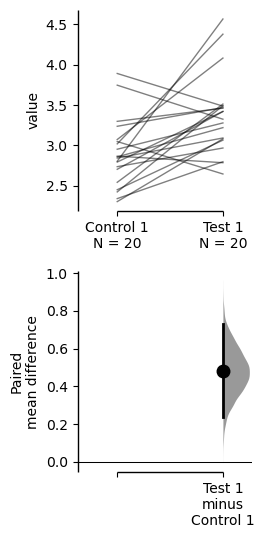

In [ ]:
two_groups_paired_baseline.mean_diff.plot(float_contrast=False);

You can also create repeated-measures plots with multiple test groups.In
this case, declaring ``paired`` to be ``sequential`` or ``baseline`` will
generate different results.

In [ ]:
sequential_repeated_measures = dabest.load(df, idx=("Control 1", "Test 1", "Test 2", "Test 3"),
                                               paired="sequential", id_col="ID")

In [ ]:
sequential_repeated_measures.mean_diff

DABEST v0.0.1
             
Good evening!
The current time is Sat Mar 11 22:08:01 2023.

DABEST v0.0.1
             
Good evening!
The current time is Sat Mar 11 22:08:01 2023.

The paired mean difference for the sequential design of repeated-measures experiment 
between Control 1 and Test 1 is 0.48 [95%CI 0.237, 0.73].
The p-value of the two-sided permutation t-test is 0.001, calculated for legacy purposes only. 

The paired mean difference for the sequential design of repeated-measures experiment 
between Test 1 and Test 2 is -1.02 [95%CI -1.36, -0.716].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

The paired mean difference for the sequential design of repeated-measures experiment 
between Test 2 and Test 3 is 0.716 [95%CI 0.14, 1.22].
The p-value of the two-sided permutation t-test is 0.022, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-valu

C:\Users\zhang\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
C:\Users\zhang\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


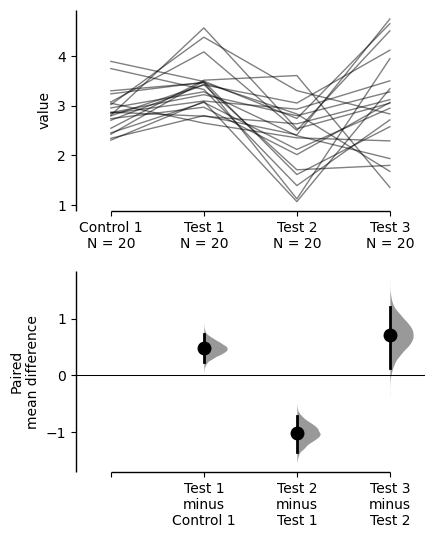

In [ ]:
sequential_repeated_measures.mean_diff.plot();

In [ ]:
baseline_repeated_measures = dabest.load(df, idx=("Control 1", "Test 1", "Test 2", "Test 3"),
                                               paired="baseline", id_col="ID")

In [ ]:
baseline_repeated_measures.mean_diff

DABEST v0.0.1
             
Good evening!
The current time is Sat Mar 11 22:08:24 2023.

DABEST v0.0.1
             
Good evening!
The current time is Sat Mar 11 22:08:24 2023.

The paired mean difference for repeated measures against baseline 
between Control 1 and Test 1 is 0.48 [95%CI 0.237, 0.73].
The p-value of the two-sided permutation t-test is 0.001, calculated for legacy purposes only. 

The paired mean difference for repeated measures against baseline 
between Control 1 and Test 2 is -0.542 [95%CI -0.975, -0.198].
The p-value of the two-sided permutation t-test is 0.014, calculated for legacy purposes only. 

The paired mean difference for repeated measures against baseline 
between Control 1 and Test 3 is 0.174 [95%CI -0.297, 0.706].
The p-value of the two-sided permutation t-test is 0.505, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing t

C:\Users\zhang\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
C:\Users\zhang\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


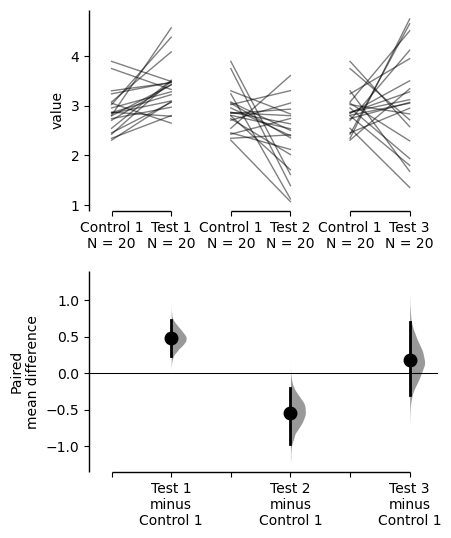

In [ ]:
baseline_repeated_measures.mean_diff.plot();

Same as that for unpaired data, DABEST empowers you to perform complex 
visualizations and statistics for paired data as well.

C:\Users\zhang\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
C:\Users\zhang\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


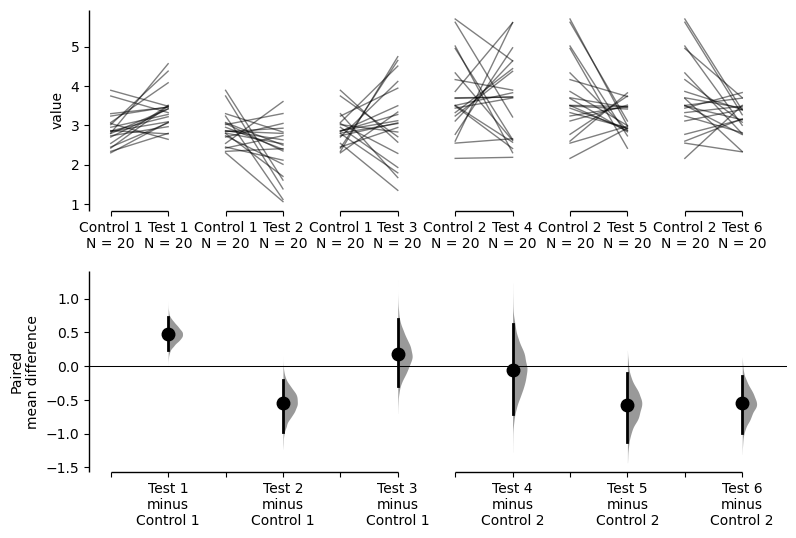

In [ ]:
multi_baseline_repeated_measures = dabest.load(df, idx=(("Control 1", "Test 1", "Test 2", "Test 3"),
                                                      ("Control 2", "Test 4", "Test 5", "Test 6")),
                                               paired="baseline", id_col="ID")
multi_baseline_repeated_measures.mean_diff.plot();